*--**--*--**--*--**--*--**--*--**--*--**--*--**--*--**--*--**--*  <br>
**Czarina Julia C. Cueco** <br>
2ECEB <br>
*--**--*--**--*--**--*--**--*--**--*--**--*--**--*--**--*--**--*

# Exploratory Data Analysis on Spotify 2023 Dataset
This repository presents a detailed exploratory data analysis (EDA) of the Most Streamed Spotify Songs 2023 dataset. Through a combination of data analysis and visualization, we explore trends, correlations, and characteristics that contribute to track popularity on Spotify.

### Import Essential Libraries in Python

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Corresponding .Excel file into a Dataframe

In [6]:
# Import pandas library for data manipulation
import pandas as pd
# Load the Excel file containing Spotify data for 2023 into a DataFrame
# The file "spotify-2023.xlsx" should be in the same directory or specify the full path
df = pd.read_excel("spotify-2023.xlsx")
# Display the loaded DataFrame 
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## General Guidelines
### Check for missing values and data types, and perform an initial exploration

This code checks for missing values in the DataFrame `df`. The `isnull().sum()` part counts the number of missing entries in each column, and stores the result in `missing`. This shows how many missing values each column has, helping identify any gaps in the data that may need fixing before analysis.

In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

This code snippet cleans the DataFrame `df` by converting certain columns to numeric format, resolving non-numeric errors by setting them to `NaN` (missing values). Specifically:
- The `streams` column are each converted to numeric format using `pd.to_numeric()`.
- The `errors='coerce'` argument forces any non-numeric values to become `NaN`, helping handle data errors. <br>

This ensures that the columns are consistently numeric, making them ready for analysis.

In [208]:
# Remove non-numeric values from 'streams' column and convert to integer
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
#Updates the Dataframe
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


### Summary Statistics

In [108]:
# Get statistics of the numerical columns
statistics = df.describe()
statistics

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## 1. ) Overview of Dataset
> **This section examines the basic structure of the dataset, including its shape, data types, and any missing values that may affect the analysis.**

### Data types present in the Dataset
This code snippet checks the data types of each column in the DataFrame `df` after data cleaning. The `info()` method provides a summary of the DataFrame, including the number of entries, the data types of each column. The resulting output is stored in the variable `df_datatype`.

In [14]:
# Checking the datatypes of each column after cleaning
df_datatype = df.info()
df_datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

### Rows and Columns of the DatasetThis code snippet retrieves the shape of the DataFrame `df`, which indicates the number of rows and columns. The `shape` attribute returns a tuple with the first value as the number of rows and the second as the number of columns. These values are unpacked into the variables `rows` and `columns`, providing a quick overview of the dataset's dimensions.


In [16]:
# Get the shape of the dataset
rows, columns = df.shape
rows, columns

(953, 24)

## 2. ) Basic Descriptive Statistics> **This section provides an overview of the key statistics for the streams column, including mean, median, and standard deviation, as well as an exploration of the distributions of the release years and artist counts.**


### Getting the mean, median, and standard deviation of the streams columnThis code snippet calculates the mean, median, and standard deviation of the `streams` column in the DataFrame `df`. 

It uses the following methods:
- `mean()` to compute the average number of streams.
- `median()` to find the middle value of the stream counts.
- `std()` to determine the standard deviation, which measures the variation or dispersion of the stream cog data.


In [19]:
# Calculate mean, median, and standard deviation of the 'streams' column
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

print("Mean of streams:", mean_streams)
print("Median of streams:", median_streams)
print("Standard deviation of streams:", std_streams)

Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.0388832


### Distribution of released_year and artist_count and their Trends or Outliers?The code begins by setting the figure size using `plt.figure(figsize=(10, 6))`, which defines the dimensions of the plot. The `sns.lineplot()` function is then used to plot a lineplot of the `released_year` and `artist_count` column from the `df` DataFrame. Afterward, `plt.xlabel()` and `plt.ylabel()` are used to label the x-axis and y-axis, respectively, and `plt.title()` adds a title to the plot. Lastly, `plt.show()` renders the plot for visualization.


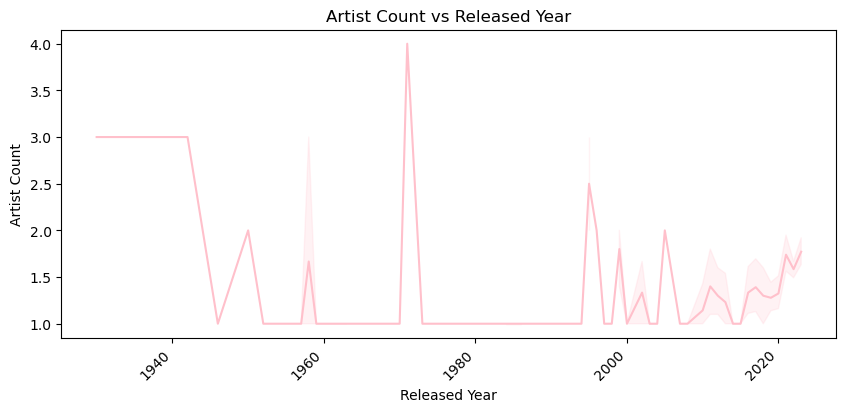

In [158]:
# Plotting a line plot between artist_count and released_year
plt.figure(figsize=(10, 4))

# Line plot
sns.lineplot(x='released_year', y='artist_count', data=df, color='pink')

# Adding labels and title
plt.xlabel('Released Year')
plt.ylabel('Artist Count')
plt.title('Artist Count vs Released Year')

# Rotate x-axis labels for better spacing
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

## 3. ) Top Performers
> **In this section, the standout tracks in the dataset are identified based on streaming performance. The most streamed track is highlighted, along with an exploration of the artists who have the highest representation in the dataset.**

### Display the track that has the highest number of streams and the top 5 most streamed tracksThis code snippet identifies the track with the highest number of streams and the top five most-streamed tracks in the DataFrame `df`. It sorts the DataFrame by the `streams` column in descending order using `sort_values()`, and then retrieves the first five rows with `head()`. The results are stored in the variable `top_spotify_streams`. Finally, it prints the names and stream counts of the top five most-streamed tracks, displaying the `track_name`, `artist(s)_name` and `streams` columns for easy reference.


In [89]:
# Select relevant columns and sort by streams in descending order
top_spotify_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head()
# Display top 10 songs with the highest streams
top_spotify_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


### Display the top 5 most frequent artists based on the number of tracks in the dataset
This code snippet counts the number of tracks for each artist in the DataFrame `df` by using the `value_counts()` method on the `artist(s)_name` column. The `head()` method limits the output to the top five artists with the most tracks. The result is stored in the variable `top_artists`, providing a quick overview of the most prolific artists in the dataset.

In [63]:
# Group by 'artist' and count the number of tracks for each artist
top_artists = df['artist(s)_name'].value_counts().head()

# Convert the Series to a DataFrame and reset the index for tabular display
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['Artist', 'Track Count']

# Display the result 
top_artists_df

,Artist,Track Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


## 4. ) Temporal Trends
> **This section delves into the release patterns of tracks over time, including a visualization of the number of tracks released annually and an analysis of monthly trends that may reveal peak periods for new music.**

### Display the trends in the number of tracks released over time and Plot of the number of tracks released per year
This code snippet plots the number of tracks released each year using the DataFrame `df`. It first counts the occurrences of each year in the `released_year` column with the `value_counts()` method, and then sorts these counts in ascending order using `sort_index()`. The results are stored in the variable `year_counts`. Next, a line plot is created using the `plot()` method. Finally, `plt.show()` displays the line graph, providing a visual representation of the number of tracks released in each year, allowing for easy identification of trends over time.


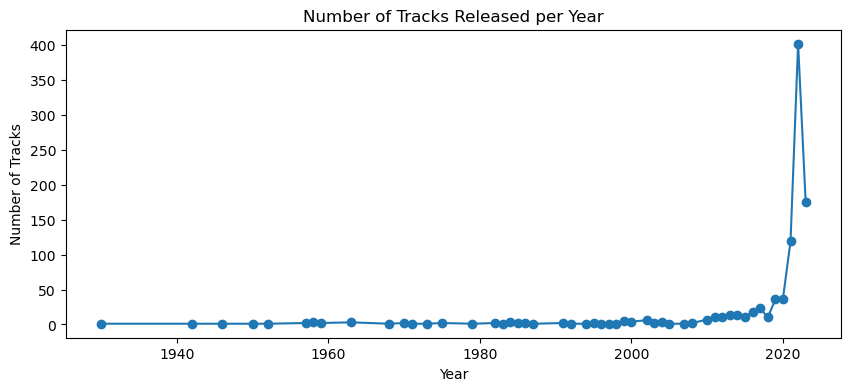

In [154]:
# Count tracks released per year and sort by year
year_counts = df['released_year'].value_counts().sort_index()

# Plot the counts as a line chart
year_counts.plot(kind='line', figsize=(10, 4), marker='o')

# Add title and labels
plt.title("Number of Tracks Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")

# Display the plot
plt.show()

### Display the number of tracks released per month
This code snippet plots the number of tracks released each month from the DataFrame `df`. It first counts the occurrences of each month in the `released_month` column using `value_counts()`, and the results are sorted by month using `sort_index()`. The resulting counts are stored in the variable `month_counts`. 
Next, a bar plot is created using the `plot()` method, with the kind set to 'bats" The `xticks` method sets the ticks to correspond to the months of the year, labeling them from January to December. Finally, `plt.show()` displays the bar graph, providing a clear visualization of how many tracks were released in each month.


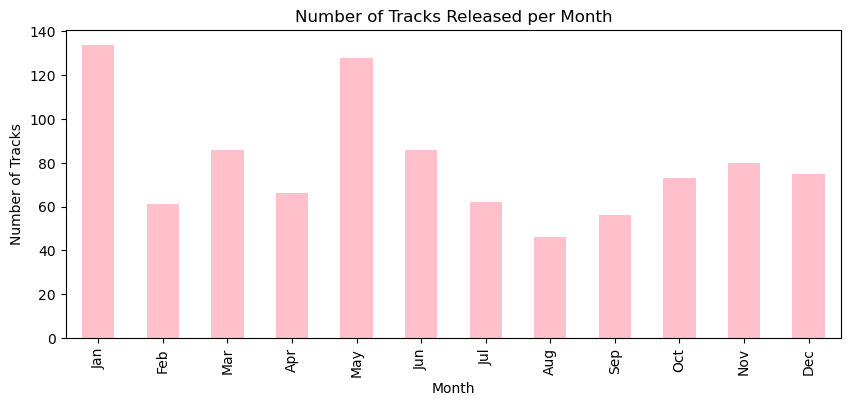

In [160]:
# Count tracks released per month and sort by month order
month_counts = df['released_month'].value_counts().sort_index()

# Plot the counts as a bar chart
month_counts.plot(kind='bar', figsize=(10, 4), color='pink')

# Add title and axis labels
plt.title("Number of Tracks Released per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")

# Set custom x-tick labels for months
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()

## 5. ) Genre and Music Characteristics
> **The analysis in this section focuses on the relationship between streaming numbers and various musical attributes, examining correlations that may shed light on what contributes to a track's popularity.**

### Display a visualization of the correlation between streams and musical attributes like bpm, danceability_%, and energy_%
This code snippet performs a correlation analysis on the DataFrame `df`, focusing on the attributes `streams`, `bpm`, `danceability_%`, and `energy_%`. It computes the pairwise correlation coefficients between these columns using the `corr()` method, resulting in a correlation matrix stored in the variable `correlations`. This matrix is printed to the console, showing how each attribute relates to the others. 
Next, a heatmap is created using Seaborn to visually represent the correlation matrix. The `annot=True` parameter adds the correlation coefficients directly onto the heatmap for easy interpretationd `plt.show()` is called to display the heatmap, providing a clear visual overview of the relationships between streams and the selected musical attributes.


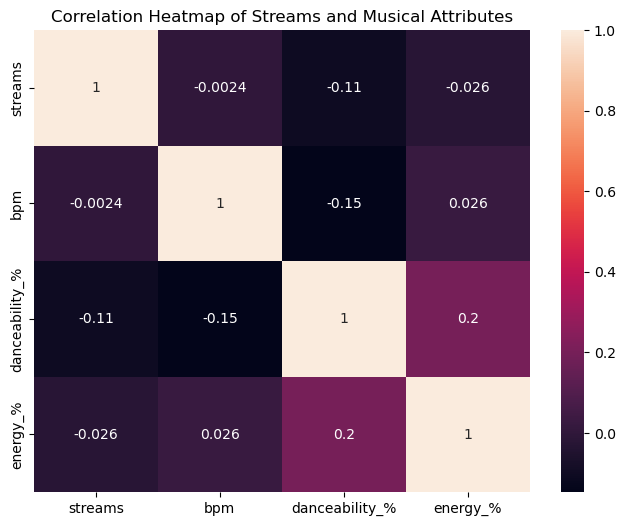

In [69]:
# Perform correlation analysis on selected columns
correlations = df[['streams','bpm', 'danceability_%', 'energy_%']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True)

# Add title to the heatmap
plt.title("Correlation Heatmap of Streams and Musical Attributes")

# Display the heatmap
plt.show()

### Display a visualization of the correlation between danceability_% and energy_% and valence_% and acousticness_%
This code calculates the correlation between the attributes `danceability_%`, `energy_%`, `valence_%`, and `acousticness_%` in the DataFrame `df`, resulting in a correlation matrix stored in `selected_corr`. The matrix is printed to the console. Then, a heatmap is created using Seaborn to visualize these correlations, `annot=True` option displays the correlation values on the heatmap. Finally, `plt.show()` displays the heatmap.m.

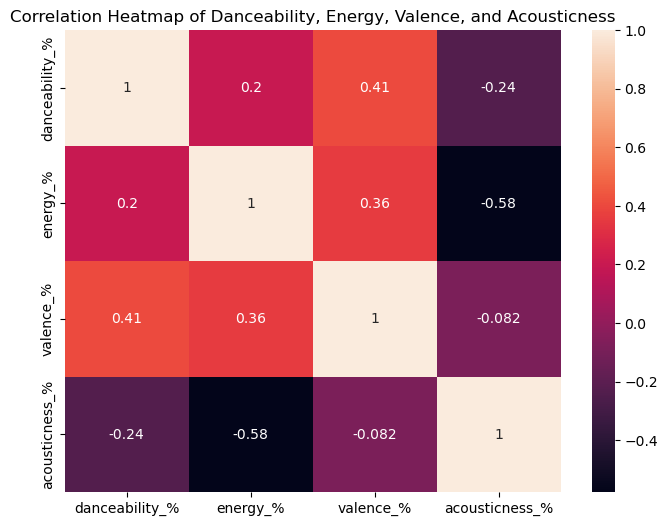

In [71]:
# Correlation between selected attributes
selected_corr = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True)

# Add title to the heatmap
plt.title("Correlation Heatmap of Danceability, Energy, Valence, and Acousticness")

# Display the heatmap
plt.show()

## 6. ) Platform Popularity
> **In this section, the number of tracks featured across different platforms—Spotify and Apple Music—is compared to understand where the most popular tracks are found.**

### Display a visualization of the comparison of tracks in spotify_playlists, spotify_charts, and apple_playlistsThis code snippet calculates the total number of tracks across different playlist columns in the DataFrame `df`. It creates a dictionary called `platform_counts`, which sums the number of tracks in Spotify playlists, Spotify charts, and Apple playlists. 
Next, it generates a bar plot to visualize platform popularity. Finally, `plt.show()` displays the bar graph, illustrating the total number of tracks across each platform.


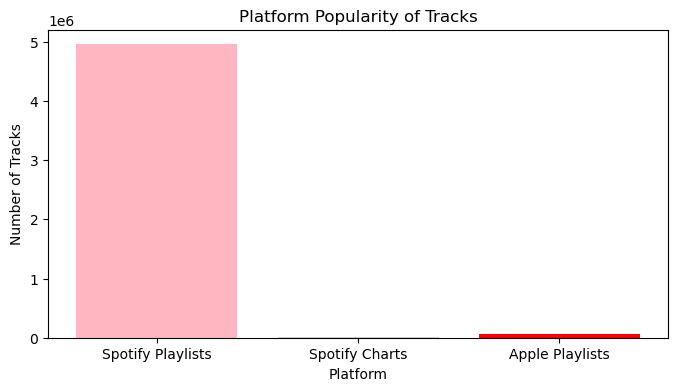

In [166]:
# Sum up the tracks across different playlist columns for each platform
platform_counts = {
    'Spotify Playlists': df['in_spotify_playlists'].sum(),
    'Spotify Charts': df['in_spotify_charts'].sum(),
    'Apple Playlists': df['in_apple_playlists'].sum()
}

# Plot the popularity of tracks across different platforms
plt.figure(figsize=(8, 4))

# Create a bar plot with different colors for each platform
plt.bar(platform_counts.keys(), platform_counts.values(), color=['lightpink', 'pink', 'red'])

# Add title and axis labels
plt.title("Platform Popularity of Tracks")
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")

# Display the plot
plt.show()

## 7. ) Advanced Analysis
> **Finally, this section conducts a deeper analysis to identify patterns among tracks, considering factors such as musical key and genre. It also explores the consistency of artist appearances in playlists and charts, offering insights into their popularity across platforms.**

### Display a visualization based on the streams data that identifies any patterns among tracks with the same key or mode (Major vs. Minor)This code groups the DataFrame `df` by musical key and mode to calculate the average streams, creating a pivot table called `key_mode_streams`. It then generates a bar graph with light pink bars for minor keys and light blue for major keys, setting the figure size to 10 by 8 units. The plot includes a title, labeled axes, and a legend for the modes. The x-axis labels are rotated 45 degrees for clarity, and `plt.show()` displays the final graph, visualizing the average streams by key and mode.


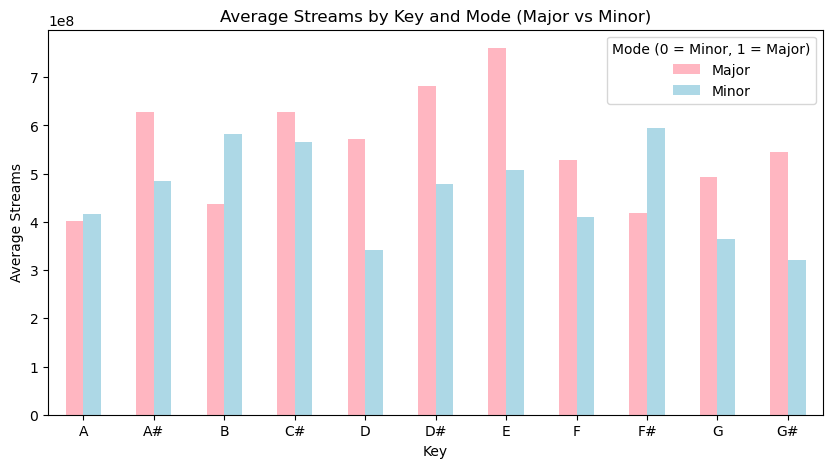

In [230]:
# Grouping by 'key' and 'mode' to calculate the average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().unstack()

# Plotting the bar graph with the specified figure size and colors directly in the plot method
ax = key_mode_streams.plot(kind='bar', stacked=False, color=['lightpink', 'lightblue'], figsize=(10, 5))

# Adding title and labels to the plot
plt.title("Average Streams by Key and Mode (Major vs Minor)")
plt.xlabel("Key")
plt.ylabel("Average Streams")

# Customizing the legend
plt.legend(title="Mode (0 = Minor, 1 = Major)", loc='upper right')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Display artists who consistently appear in more playlists or charts 

The analysis reveals that artists like The Weeknd, Taylor Swift, and Ed Sheeran dominate playlist appearances, especially on platforms like Spotify and Apple Music, with a notable presence in charts as well. Pop artists lead in playlists, while other genres like hip-hop (Eminem) and indie rock (Arctic Monkeys) show up in both playlists and charts, albeit less frequently. The higher appearance of these artists in playlists suggests the influence of curated content on visibility, while charts reflect broader, sustained popularity. This indicates that playlists play a significant role in promoting tracks, while chart appearances reflect more sustained mainstream success.

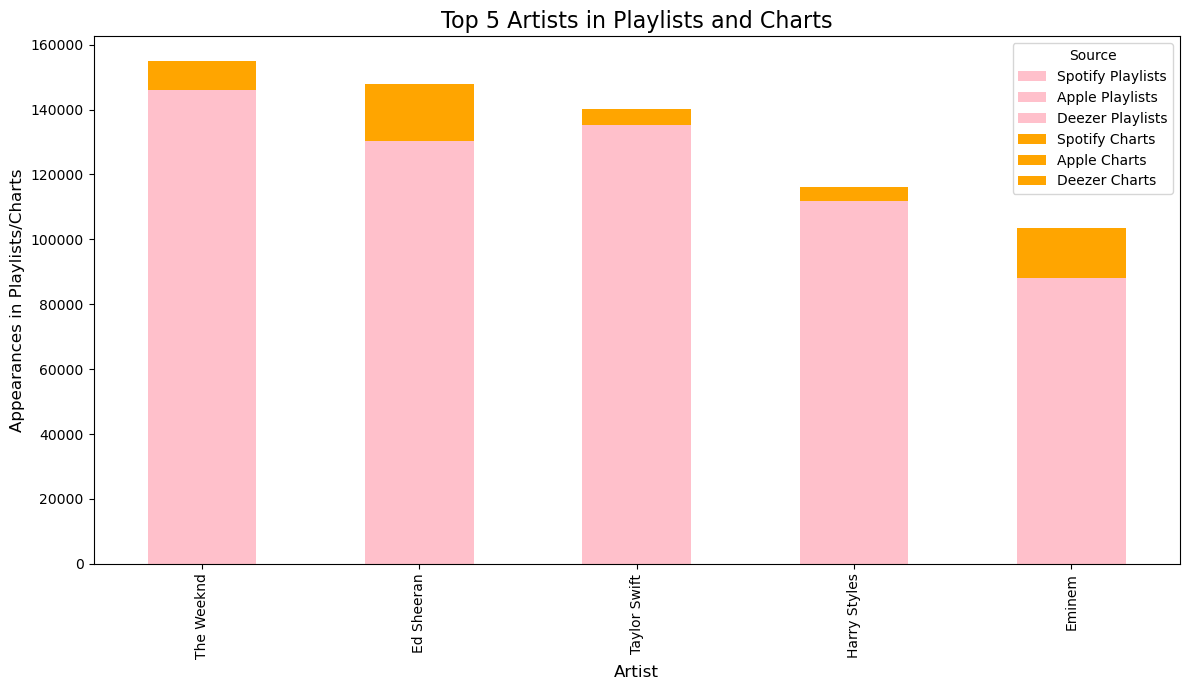

In [240]:
# Add more platforms to the playlist_counts by summing across the additional columns
playlist_counts = df.groupby('artist(s)_name')[[
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts'
]].sum()

# Filter the top 5 most featured artists
top_artists = playlist_counts.sum(axis=1).sort_values(ascending=False).head(5)

# Plotting a bar chart for the top 5 featured artists with stacked bars
ax = playlist_counts.loc[top_artists.index].plot(kind='bar', stacked=True, figsize=(12, 7), color=['pink', 'pink', 'pink', 'orange', 'orange', 'orange'])

# Adding title and axis labels to the chart
plt.title("Top 5 Artists in Playlists and Charts", fontsize=16)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Appearances in Playlists/Charts", fontsize=12)

# Adding a legend to differentiate between playlists and charts
plt.legend(title="Source", labels=['Spotify Playlists', 'Apple Playlists', 'Deezer Playlists', 'Spotify Charts', 'Apple Charts',  'Deezer Charts'], loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()